### Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn.csv')

### Understanding the data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Manipulation

TotalCharges is object type. So we have to change it to numeric.

In [6]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.drop('customerID', axis=1, inplace=True)


In [9]:
col_cat = df.select_dtypes(include='object').drop('Churn', axis=1).columns.tolist()
col_num = df.select_dtypes(exclude='object').columns.tolist()

In [10]:
for c in col_cat:
    print('Column {} unique values: {}'.format(c, len(df[c].unique())))

Column gender unique values: 2
Column Partner unique values: 2
Column Dependents unique values: 2
Column PhoneService unique values: 2
Column MultipleLines unique values: 3
Column InternetService unique values: 3
Column OnlineSecurity unique values: 3
Column OnlineBackup unique values: 3
Column DeviceProtection unique values: 3
Column TechSupport unique values: 3
Column StreamingTV unique values: 3
Column StreamingMovies unique values: 3
Column Contract unique values: 3
Column PaperlessBilling unique values: 2
Column PaymentMethod unique values: 4


### Data Visualization

Let's visualize object type data

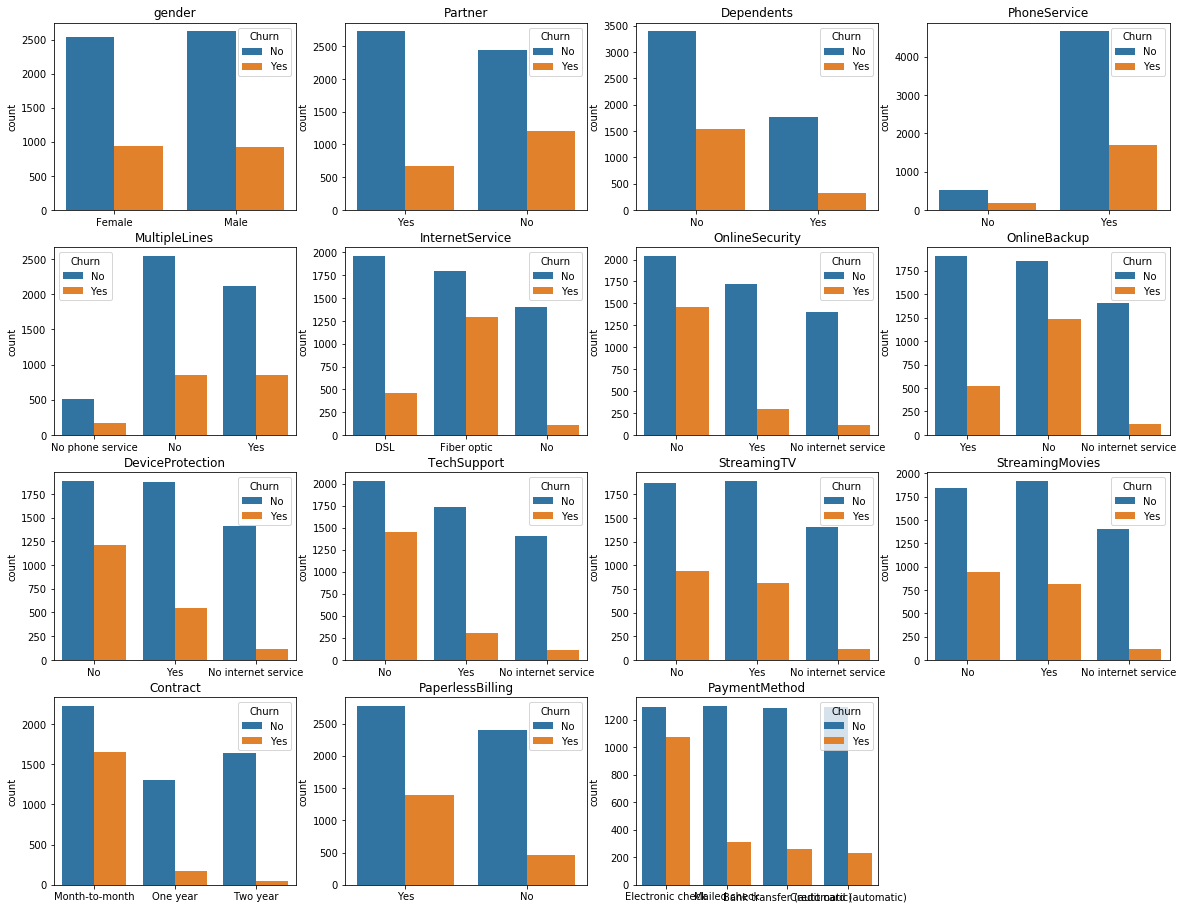

In [11]:
plt.figure(figsize=(20,20))
for i,c in enumerate(col_cat):
    plt.subplot(5,4,i+1)
    sns.countplot(df[c], hue=df['Churn'])
    plt.title(c)
    plt.xlabel('')

Visualizing Numeric type data

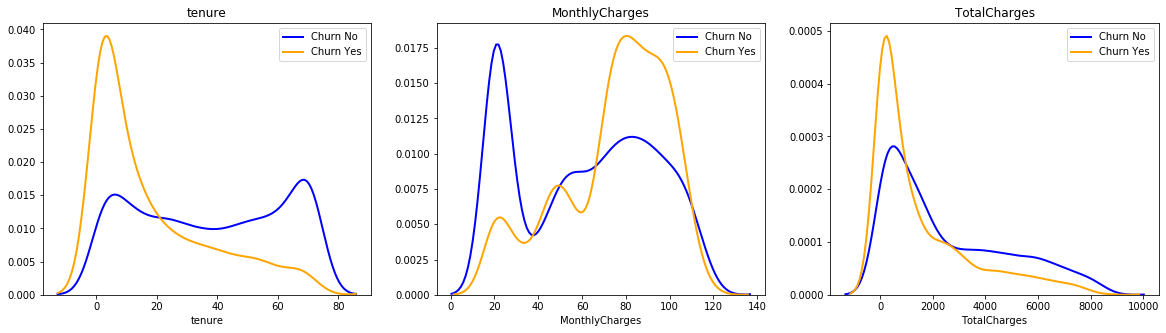

In [12]:
plt.figure(figsize=(20,5))
for i,c in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1,3,i+1)
    sns.distplot(df[df['Churn'] == 'No'][c], kde=True, color='blue', hist=False, kde_kws=dict(linewidth=2), label='Churn No')
    sns.distplot(df[df['Churn'] == 'Yes'][c], kde=True, color='Orange', hist=False, kde_kws=dict(linewidth=2), label='Churn Yes')
    plt.title(c)


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [15]:
df = df.apply(lambda x: object_to_int(x))

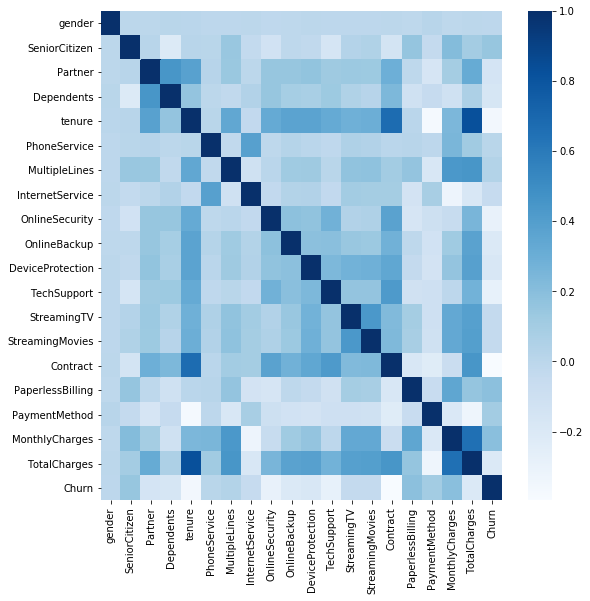

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), cmap='Blues')

### Conclusion
* More the tenure is ,lesser is the churn ratio.
* Higher the monthly charge is, higher the churn.
* Churned data points are concentrated in high monthly charge and low tenure.
* Not churned data points are concentrated in a)low monthly charge and low tenure and b)high monthly charge and high tenure.


### Implement Machine Learning Models

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [18]:
X= df.drop('Churn', 1)
y = df['Churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=40)

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression(max_iter=1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

DecisionTree : 0.7071090047393365
RandomForest : 0.7772511848341233
Naive Bayes : 0.7398104265402844
KNeighbours : 0.7587677725118483
SVM : 0.737914691943128
LogisticRegression : 0.7924170616113744
ExtraTreesClassifier : 0.7687203791469195
AdaBoostClassifier : 0.7843601895734598
GradientBoostingClassifier:  0.7895734597156399
XGB : 0.795734597156398


#### We will use Voting Classifier here. Voting classifier combines the predictions from multiple classifier models. From above cell output, we can see that best classifiers are XGB, GradientBossting and Logistic Regression. Let's use these as input to voting classifier.

In [20]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression(max_iter=1000)
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8004739336492891


### Model Evaluation

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [22]:
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df


In [42]:
model1=model_report(clf1,X_train,X_test,y_train,y_test,'GradientBoostingClassifier')
model2=model_report(clf2,X_train,X_test,y_train,y_test,'LogisticRegression')
model3=model_report(clf3,X_train,X_test,y_train,y_test,'XGBoost')
model4=model_report(eclf1,X_train,X_test,y_train,y_test,'VotingClassifier')

In [43]:
model_performances=pd.concat([model1,model2,model3,model4],axis=0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)

In [44]:
model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,GradientBoostingClassifier,0.789573,0.522604,0.616205,0.565558,0.703499,0.427956
1,LogisticRegression,0.792417,0.544304,0.618070,0.578846,0.712422,0.441845
2,XGBoost,0.795735,0.535262,0.629787,0.578690,0.711754,0.445045
3,VotingClassifier,0.800948,0.538879,0.643629,0.586614,0.716453,0.456879


Voting classifier outperforms all.